<a href="https://www.kaggle.com/code/ankushch707/wind-power-forecasting?scriptVersionId=176871404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

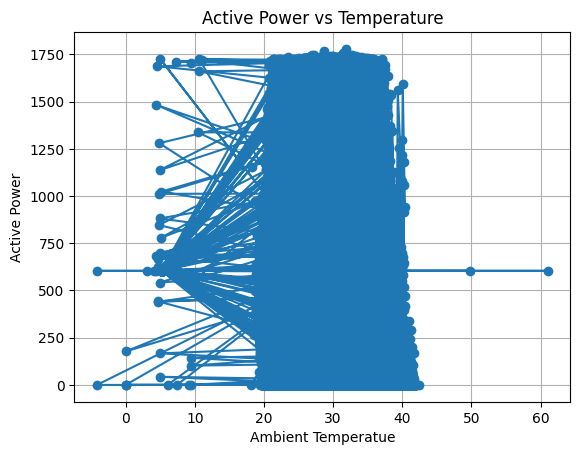

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature',
       'GeneratorWinding1Temperature', 'HubTemperature', 'MainBoxTemperature',
       'ReactivePower', 'RotorRPM', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/windpower/fd (1).csv')
df.columns
train_dates=df['Unnamed: 0']
df.columns
plt.plot(df['AmbientTemperatue'], df['ActivePower'], marker='o')
plt.xlabel('Ambient Temperatue' )
plt.ylabel('Active Power')
plt.title('Active Power vs Temperature')
plt.grid(True)
plt.show()
df.columns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


trainX shape == (67522, 14, 12).
trainY shape == (67522, 1).
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 32161 (125.63 KB)
Trainable params: 32161 (125.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
7/7 [==============================] - 0s 7ms/step


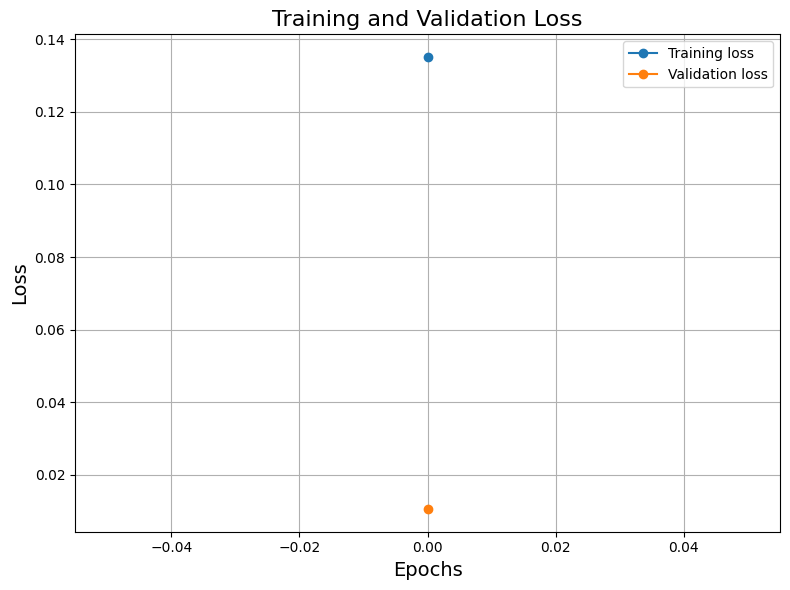

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

cols = list(df)[1:13]
df_for_training = df[cols].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit the model
history = model.fit(trainX, trainY, epochs=1, batch_size= 12, validation_split=0.1, verbose=1)
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
plt.plot(history.history['loss'], label='Training loss',marker='o',linestyle='-')
plt.plot(history.history['val_loss'], label='Validation loss',marker='o',linestyle='-')
plt.xlabel('Epochs', fontsize=14)  # Adjust font size
plt.ylabel('Loss', fontsize=14)  # Adjust font size
plt.title('Training and Validation Loss', fontsize=16)  # Adjust font size
plt.legend(fontsize=12)  # Adjust legend font size
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.legend()
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
n_past = 10
n_days_for_prediction=200
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])
#shape = (n, 1) where n is the n_days_for_prediction
prediction_copies = np.repeat(prediction,df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,1]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Date and Time':np.array(forecast_dates), 'Active Power':y_pred_future})


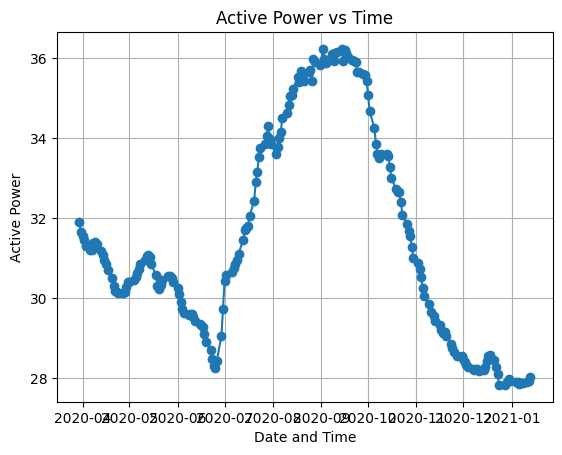

In [4]:
plt.plot(df_forecast['Date and Time'], df_forecast['Active Power'], marker='o')
plt.xlabel('Date and Time' )
plt.ylabel('Active Power')
plt.title('Active Power vs Time')
plt.grid(True)
plt.show()


Model Implementation LSTM 
